# Fake -News Detection Project 

### Problem statement:

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 


In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.


### Data- Description:


There are 6 columns in the dataset provided to you. The description of each of the column is given below:

“id”:  Unique id of each news article
“headline”:  It is the title of the news.
“news”:  It contains the full text of the news article
“Unnamed:0”:  It is a serial number
“written_by”:  It represents the author of the news article
“label”:  It tells whether the news is fake (1) or not fake (0).


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [87]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [88]:
# Importing dataset using pandas dataframe

In [89]:
df1 = pd.read_csv("train_news.csv")

In [90]:
df1.shape

(20800, 6)

In [91]:
df1

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [92]:
df1.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [93]:
df1.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [94]:
df1 = df1.set_index("Unnamed: 0")

In [95]:
df1.head()

,id,headline,written_by,news,label
Unnamed: 0,,,,,
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [96]:
df1.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


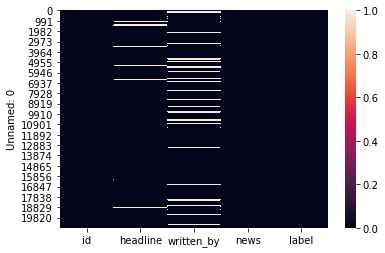

In [97]:
import seaborn as sns
sns.heatmap(df1.isnull())

In [98]:
df1.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [99]:
df=df1.dropna(inplace=True)


In [100]:
df1

,id,headline,written_by,news,label
Unnamed: 0,,,,,
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1


In [101]:
df1.isnull().sum()

id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

In [102]:
df1.headline[1]

'U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times'

In [103]:
df1.news[1]

'HOUSTON  —   Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael Dudamel said. “They had an incredible pass from Messi, and they scored. ” Messi has freque

In [104]:
df1['head_news_written'] = df1['headline'] +' '+ df1['news'] +''+ df1['written_by']
df1.tail()

,id,headline,written_by,news,label,head_news_written
Unnamed: 0,,,,,,
20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,One Police Shift: Patrolling an Anxious Americ...
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,Albert Pike and the European Migrant Crisis By...
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,Dakota Access Caught Infiltrating Protests to ...
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,How to Stretch the Summer Solstice - The New Y...
20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0,Emory University to Pay for ’100 Percent’ of U...


In [105]:
df1.head_news_written[20799	]

'Emory University to Pay for ’100 Percent’ of Undocumented Students’ Financial Aid - Breitbart Emory University in Atlanta, Georgia, has announced that they will fund ‘100 percent’ of financial aid packages for students that are in the country illegally. [Although international students are expected to pay full tuition, undocumented undergraduate students at Emory will have “100% of demonstrated financial need” covered by the university.  “Emory meets 100% of demonstrated financial need for undergraduate Undocumented Students (with or without DACA) who are admitted as      students, and who graduated from a U. S. High school through a combination of grants and scholarships, institutional work study (DACA students only) and institutional loans. Undocumented Students without DACA status may receive an institutional loan in place of the typical work study award,” the university’s website states. Speaking to The College Fix, Megan McRainey, a spokeswoman for Emory, claimed that providing f

In [106]:
df1.head_news_written[20797]

'Dakota Access Caught Infiltrating Protests to Incite Violence, Funding Trolls Online posted by Eddie You know the Dakota Access Pipeline protests are working when oil interests start resorting to underhanded tricks to paint water protectors in a negative light. As the fight against the pipeline grows in North Dakota and around the country, dirty tricks are being deployed in an apparent attempt to delegitimize the opposition. Dakota Access Employee Tries to Incite Violence, Sheriff’s Department Makes False Report That He Was Shot by Protesters Mother Jones journalist Wes Enzinna, who was at the protests, says he witnessed a Dakota Access LLC employee try to infiltrate the Dakota Access Pipeline protests: “An armed security agent employed by the company behind the controversial Dakota Access Pipeline was arrested Thursday after he was caught entering the camp of activists protesting near the Standing Rock Indian Reservation in southern North Dakota. After a car chase and a standoff duri

In [107]:
df1.head()

,id,headline,written_by,news,label,head_news_written
Unnamed: 0,,,,,,
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningh...


In [108]:
df1.drop("headline", axis=1,inplace=True)
df1.drop("written_by", axis=1,inplace=True)
df1.drop("news", axis=1,inplace=True)
df1.head()

,id,label,head_news_written
Unnamed: 0,,,
0,9653,0,Ethics Questions Dogged Agriculture Nominee as...
1,10041,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,19113,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,6868,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,1,A Digital 9/11 If Trump Wins Finian Cunningh...


In [109]:
#Remove HTML tags
#Regex rule : ‘<.*?>’

def clean(head_news_written):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',head_news_written) 

df1.head_news_written = df1.head_news_written.apply(clean)
df1.head_news_written[0]

'Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run 

In [110]:
#Remove special characters
def is_special(head_news_written):
    rem = ''
    for i in head_news_written:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df1.head_news_written = df1.head_news_written.apply(is_special)
df1.head_news_written[0]

'Ethics Questions Dogged Agriculture Nominee as Georgia Governor   The New York Times WASHINGTON      In Sonny Perdue s telling  Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003      a time when he gave his own version of a  drain the swamp  pledge   My first goal as governor is to restore public trust in state government by changing the culture of state government   Mr  Perdue told a leadership conference at Kennesaw State University in April 2003   Our form of government depends on a mutual bond of trust between the people and their government  But people have become cynical about their government    But Mr  Perdue  a Republican who is awaiting confirmation to serve as President Trump s agriculture secretary  became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor  The criticism centers on the fact that  as Mr  Trump has  he continued to own or help run 

In [111]:
#Convert everything to lowercase
def to_lower(head_news_written):
    return head_news_written.lower()

df1.head_news_written = df1.head_news_written.apply(to_lower)
df1.head_news_written[0]

'ethics questions dogged agriculture nominee as georgia governor   the new york times washington      in sonny perdue s telling  georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003      a time when he gave his own version of a  drain the swamp  pledge   my first goal as governor is to restore public trust in state government by changing the culture of state government   mr  perdue told a leadership conference at kennesaw state university in april 2003   our form of government depends on a mutual bond of trust between the people and their government  but people have become cynical about their government    but mr  perdue  a republican who is awaiting confirmation to serve as president trump s agriculture secretary  became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor  the criticism centers on the fact that  as mr  trump has  he continued to own or help run 

In [112]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshvardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkarshvardhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
#Remove stopwords
def rem_stopwords(head_news_written):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(head_news_written)
    return [w for w in words if w not in stop_words]

df1.head_news_written = df1.head_news_written.apply(rem_stopwords)
df1.head_news_written[0]

['ethics',
 'questions',
 'dogged',
 'agriculture',
 'nominee',
 'georgia',
 'governor',
 'new',
 'york',
 'times',
 'washington',
 'sonny',
 'perdue',
 'telling',
 'georgians',
 'growing',
 'weary',
 'corruption',
 'scandals',
 'state',
 'took',
 'governor',
 '2003',
 'time',
 'gave',
 'version',
 'drain',
 'swamp',
 'pledge',
 'first',
 'goal',
 'governor',
 'restore',
 'public',
 'trust',
 'state',
 'government',
 'changing',
 'culture',
 'state',
 'government',
 'mr',
 'perdue',
 'told',
 'leadership',
 'conference',
 'kennesaw',
 'state',
 'university',
 'april',
 '2003',
 'form',
 'government',
 'depends',
 'mutual',
 'bond',
 'trust',
 'people',
 'government',
 'people',
 'become',
 'cynical',
 'government',
 'mr',
 'perdue',
 'republican',
 'awaiting',
 'confirmation',
 'serve',
 'president',
 'trump',
 'agriculture',
 'secretary',
 'became',
 'target',
 'frequent',
 'criticism',
 'failing',
 'honor',
 'ethics',
 'pledge',
 'eight',
 'years',
 'governor',
 'criticism',
 'center

In [114]:
#Stemming

def stem_txt(head_news_written):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in head_news_written])

df1.head_news_written = df1.head_news_written.apply(stem_txt)

df1.head_news_written[0]

'ethic question dog agricultur nomine georgia governor new york time washington sonni perdu tell georgian grow weari corrupt scandal state took governor 2003 time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april 2003 form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end 2011 13 complaint file mr perdu state ethic commiss two occas rule governor

In [115]:
df1.head()

,id,label,head_news_written
Unnamed: 0,,,
0,9653,0,ethic question dog agricultur nomine georgia g...
1,10041,0,u must dig deep stop argentina lionel messi ne...
2,19113,0,cotton hous walk plank vote bill pass senat br...
3,6868,0,paul lepag besieg main governor send conflict ...
4,7596,1,digit 9 11 trump win finian cunningham written...


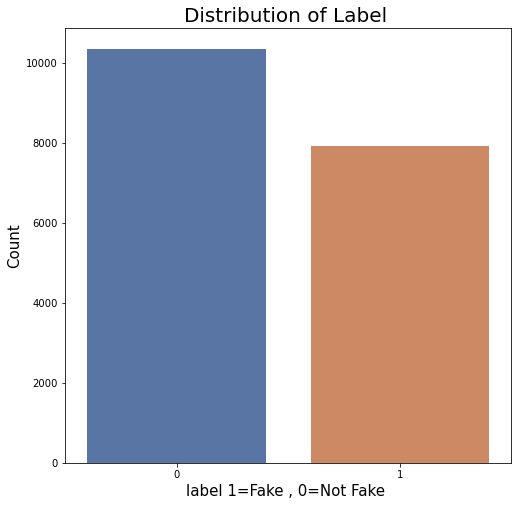

In [116]:
# Distribution of the label
plt.figure(figsize=(8,8))
sns.countplot(x = df1.label,palette='deep')
plt.xlabel('label 1=Fake , 0=Not Fake ', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Label ",fontsize= 20)
plt.show()

In [117]:
df1.drop("id", axis=1,inplace=True)
df1.head(5)

,label,head_news_written
Unnamed: 0,,
0,0,ethic question dog agricultur nomine georgia g...
1,0,u must dig deep stop argentina lionel messi ne...
2,0,cotton hous walk plank vote bill pass senat br...
3,0,paul lepag besieg main governor send conflict ...
4,1,digit 9 11 trump win finian cunningham written...


In [118]:
mid = df1['head_news_written']
df1.drop(labels=['head_news_written'], axis=1, inplace = True)
df1.insert(0, 'head_news_written', mid)
df1.head()

,head_news_written,label
Unnamed: 0,,
0,ethic question dog agricultur nomine georgia g...,0
1,u must dig deep stop argentina lionel messi ne...,0
2,cotton hous walk plank vote bill pass senat br...,0
3,paul lepag besieg main governor send conflict ...,0
4,digit 9 11 trump win finian cunningham written...,1


In [119]:
#Creating Bag Of Words (BOW)

x = np.array(df1.iloc[:,0].values)
y = np.array(df1.label.values)

In [120]:
cv = CountVectorizer(max_features = 1500)

In [121]:
x = cv.fit_transform(df1.head_news_written).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (18285, 1500)
y.shape =  (18285,)


In [122]:
print(x)

[[5 0 4 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 4 ... 0 0 0]]


In [123]:
#Train test split
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2,random_state=42)
print("Train shapes : x = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : x = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : x = (14628, 1500), y = (14628,)
Test shapes : x = (3657, 1500), y = (3657,)


In [124]:
#Defining the models and Training them
gnb,mnb,bnb = GaussianNB(),MultinomialNB(),BernoulliNB()

mnb = MultinomialNB(alpha=1.0,fit_prior=True)


gnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)

MultinomialNB()

In [125]:
#Prediction and accuracy metrics to choose best model
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

print("Gaussian    = ",   accuracy_score(testy,ypg))
print("Multinomial = ",   accuracy_score(testy,ypm))
print("Bernoulli   = ",   accuracy_score(testy,ypb))

Gaussian    =  0.806672135630298
Multinomial =  0.8969100355482637
Bernoulli   =  0.6997538966365874


In [126]:
ypm

array([0, 1, 0, ..., 1, 1, 1])

In [127]:
pickle.dump(mnb,open('model1.pkl','wb'))

In [128]:
rev = """emori univers pay 100 percent undocu student financi aid breitbart emori univers atlanta georgia announc fund 100 percent financi aid packag student countri illeg although intern student expect pay full tuition undocu undergradu student emori 100 demonstr financi need cover univers emori meet 100 demonstr financi need undergradu undocu student without daca admit student graduat u high school combin grant scholarship institut work studi daca student institut loan undocu student without daca status may receiv institut loan place typic work studi award univers websit state speak colleg fix megan mcrainey spokeswoman emori claim provid full financi aid relief undocu student reflect univers commit welcom student divers background emori accept undocu student admiss financi aid includ defer action childhood arriv daca program mcrainey wrote ad provid financi aid coverag undocu student align emori goal welcom student faculti staff divers background intern student afford aid privileg undocu student forc foot 70 000 per year tuition bill wish attend prestigi georgian univers 2016 breitbart news report student emori claim scare pain student wrote chalk messag univers sidewalk tom ciccotta libertarian write econom higher educ breitbart news follow twitter tciccotta email tciccotta breitbart comtom ciccotta"""

data_clean      = clean(rev)
spl_char_removl = is_special(data_clean)
lower_case      = to_lower(spl_char_removl)
stpword_removl  = rem_stopwords(lower_case)
stemming        = stem_txt(stpword_removl)

bow,words = [],word_tokenize(stemming)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [129]:
word_dict

{'question': 1079,
 'dog': 430,
 'nomine': 924,
 'governor': 632,
 'new': 918,
 'york': 1497,
 'time': 1364,
 'washington': 1444,
 'tell': 1341,
 'grow': 640,
 'corrupt': 344,
 'scandal': 1189,
 'state': 1292,
 'took': 1369,
 'gave': 610,
 'version': 1419,
 'first': 572,
 'goal': 623,
 'public': 1071,
 'trust': 1389,
 'govern': 631,
 'chang': 251,
 'cultur': 364,
 'mr': 898,
 'told': 1368,
 'leadership': 789,
 'confer': 314,
 'univers': 1406,
 'april': 124,
 'form': 586,
 'depend': 403,
 'peopl': 991,
 'becom': 175,
 'republican': 1140,
 'confirm': 316,
 'serv': 1222,
 'presid': 1037,
 'trump': 1388,
 'secretari': 1203,
 'becam': 174,
 'target': 1335,
 'critic': 361,
 'fail': 535,
 'honor': 671,
 'eight': 466,
 'year': 1494,
 'center': 244,
 'fact': 533,
 'continu': 332,
 'help': 659,
 'run': 1174,
 'famili': 542,
 'busi': 220,
 'four': 592,
 'compani': 304,
 'one': 950,
 'last': 777,
 'member': 859,
 'senat': 1212,
 'date': 374,
 'set': 1226,
 'hear': 655,
 'releas': 1127,
 'nomin': 9

In [130]:
inp = []
for i in word_dict:
    inp.append(stemming.count(i[0]))
y_pred = mnb.predict(np.array(inp).reshape(1,1500))

In [131]:
# 0 = NOT FAKE, 1 = FAKE
if y_pred == 0:
    print ('News is good to read & its NOT FAKE')
else:
    print ('News is FAKE you should not read it')

News is FAKE you should not read it


In [132]:
rev = """dakota access caught infiltr protest incit violenc fund troll onlin post eddi know dakota access pipelin protest work oil interest start resort underhand trick paint water protector negat light fight pipelin grow north dakota around countri dirti trick deploy appar attempt delegitim opposit dakota access employe tri incit violenc sheriff depart make fals report shot protest mother jone journalist wes enzinna protest say wit dakota access llc employe tri infiltr dakota access pipelin protest arm secur agent employ compani behind controversi dakota access pipelin arrest thursday caught enter camp activist protest near stand rock indian reserv southern north dakota car chase standoff alleg point assault rifl local sioux teenag man whose id indic employe dakota access llc arrest hand fbi accord offici statement tribe man fire sever shot gun peac apprehend tribal polic wit scene say point gun sever protest man clear tri provok violenc could later use demon protest far remain peac morton counti sheriff depart circul fals report claim man shot presum protest see imag man harm sheriff depart sinc retract report anti media attempt obtain clarifi comment morton counti sheriff ignor fake internet troll slam dakota access pipelin protest promot pipelin twitter littl organ support dakota access pipelin remain group alli pipelin builder seem creat paid internet troll bot slam protest prais pipelin desmog environment blog conduct investig found say sock puppet account tie oil industri lobbi oper twitter desmog investig reveal possibl front group support controversi dakota access pipelin dapl midwest allianc infrastructur main may creat fake twitter profil known sock puppet convey pro pipelin messag social media main may employ pr servic firm dci group connect republican parti order desmog track least 16 differ question twitter account use nodapl hashtag employ protest order claim opposit pipelin kill job protest pipelin stand rock sioux tribe encamp use violenc pipelin pose risk water sourc cross tribal land septemb 13 peopl began suspect account fake call twitter septemb 14 account longer exist dakota access pipelin builder resort backhand trickeri clear tide turn pipelin follow law enforc overwhelm militar crackdown protest sourc eddi lavin"""

data_clean      = clean(rev)
spl_char_removl = is_special(data_clean)
lower_case      = to_lower(spl_char_removl)
stpword_removl  = rem_stopwords(lower_case)
stemming        = stem_txt(stpword_removl)

bow,words = [],word_tokenize(stemming)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [133]:
word_dict

{'question': 1079,
 'dog': 430,
 'nomine': 924,
 'governor': 632,
 'new': 918,
 'york': 1497,
 'time': 1364,
 'washington': 1444,
 'tell': 1341,
 'grow': 640,
 'corrupt': 344,
 'scandal': 1189,
 'state': 1292,
 'took': 1369,
 'gave': 610,
 'version': 1419,
 'first': 572,
 'goal': 623,
 'public': 1071,
 'trust': 1389,
 'govern': 631,
 'chang': 251,
 'cultur': 364,
 'mr': 898,
 'told': 1368,
 'leadership': 789,
 'confer': 314,
 'univers': 1406,
 'april': 124,
 'form': 586,
 'depend': 403,
 'peopl': 991,
 'becom': 175,
 'republican': 1140,
 'confirm': 316,
 'serv': 1222,
 'presid': 1037,
 'trump': 1388,
 'secretari': 1203,
 'becam': 174,
 'target': 1335,
 'critic': 361,
 'fail': 535,
 'honor': 671,
 'eight': 466,
 'year': 1494,
 'center': 244,
 'fact': 533,
 'continu': 332,
 'help': 659,
 'run': 1174,
 'famili': 542,
 'busi': 220,
 'four': 592,
 'compani': 304,
 'one': 950,
 'last': 777,
 'member': 859,
 'senat': 1212,
 'date': 374,
 'set': 1226,
 'hear': 655,
 'releas': 1127,
 'nomin': 9

In [134]:
inp = []
for i in word_dict:
    inp.append(stemming.count(i[0]))
y_pred1 = mnb.predict(np.array(inp).reshape(1,1500))

In [135]:
y_pred1

array([1])

In [136]:
# 0 = NOT FAKE, 1 = FAKE
if y_pred1 ==0 :
    print ('News is good to read & its NOT FAKE')
else:
    print ('News is FAKE you should not read it')

News is FAKE you should not read it
